Step 1. Ensure that you have the dataset file named transactions.csv in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1

# Q0

In [2]:
df_transactions = pd.read_csv('transactions.csv')

# Q1

In [3]:
df_transactions.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

# Q2

In [4]:
df_transactions.head(8) #where k = 8

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0


# Q3

In [5]:
df_transactions.sample(8) #Random sample where k=8

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
42618,9,CASH_OUT,256081.02,C223215743,0.00,0.00,C124540047,4328768.07,4584849.09,0,0
42772,9,CASH_OUT,334.37,C1596453009,0.00,0.00,C2112826959,1900677.28,1980528.41,0,0
60841,9,CASH_IN,169133.83,C1208327008,346724.35,515858.18,C1436393926,1287772.48,744556.90,0,0
59172,9,CASH_OUT,113185.95,C1307391454,0.00,0.00,C1220911229,3945276.43,3921000.58,0,0
144872,11,PAYMENT,4271.00,C1430675955,9141.00,4870.00,M1688963118,0.00,0.00,0,0
183678,13,CASH_OUT,3564.26,C121686184,0.00,0.00,C1015650621,209054.80,212619.06,0,0
105043,10,CASH_OUT,275749.85,C1606526386,0.00,0.00,C631424220,1920981.85,1926874.74,0,0
992,1,PAYMENT,4593.59,C175595853,78282.00,73688.41,M1339345635,0.00,0.00,0,0


# Q4

In [6]:
df_transactions.type.unique().tolist() #Dataframe unique types to a list

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

# Q5

In [7]:
df_transactions

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
199995,13,CASH_IN,149024.27,C1446913085,8688.0,157712.27,C476402209,440028.59,321427.51,0,0
199996,13,PAYMENT,71076.01,C1421983410,50291.0,0.00,M855368711,0.00,0.00,0,0
199997,13,CASH_OUT,147125.05,C80624764,0.0,0.00,C747330421,1058502.64,1325544.47,0,0
199998,13,CASH_OUT,97529.67,C595001108,0.0,0.00,C575555170,1921846.97,2019376.64,0,0


# Q6

In [8]:
df_transactions['nameDest'].value_counts().head(10) #Return a Pandas series of the top 10 transaction destinations with frequencies

C985934102     84
C1286084959    80
C248609774     75
C1590550415    74
C2083562754    74
C665576141     72
C977993101     70
C1360767589    69
C451111351     66
C97730845      64
Name: nameDest, dtype: int64

# Q7

In [47]:
df_transactions[df_transactions.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [10]:
df_transactions.groupby("nameDest")["newbalanceDest"].agg("mean").sort_values(ascending=False) # Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find groupby and agg useful. The predefined aggregate functions are under pandas.core.groupby.GroupBy.*. See the left hand column.

nameDest
C1620573488    3.421761e+07
C161550987     3.153192e+07
C896393489     3.073569e+07
C891089759     3.038268e+07
C1383605612    2.899566e+07
                   ...     
M2101388965    0.000000e+00
M2101397636    0.000000e+00
M2101456637    0.000000e+00
M210148519     0.000000e+00
C1000038153    0.000000e+00
Name: newbalanceDest, Length: 94801, dtype: float64

# Part 2

In [11]:
def visual_1(df):
    def transaction_counts(df):
        df.plot.bar(x='type', title='Transaction Counts', stacked=True)
        
    def transaction_counts_split_by_fraud(df):
        groupeddata = df.groupby(df['type'])
        return groupeddata

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar') # FIRST ONE HERE
    axs[0].set_title('Transaction count')
    axs[0].set_xlabel('Type')
    axs[0].set_ylabel('Count')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar') #SECOND ONE HERE
    axs[1].set_title('Transaction counts split by fraud')
    axs[1].set_xlabel('Transaction Type')
    axs[1].set_ylabel('Count')
    fig.suptitle('Split by Fraud')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return ('A bar graph showing the ransaction counts split by frequency of fraud detected.')

# Question 1

'The data suggests that fraudelent activity is only seen in "CASH_OUT" and "TRANSFER" transactions. As such, it is recommended that management should focus on improving the security and reviewing on transactions in these two sectors.'

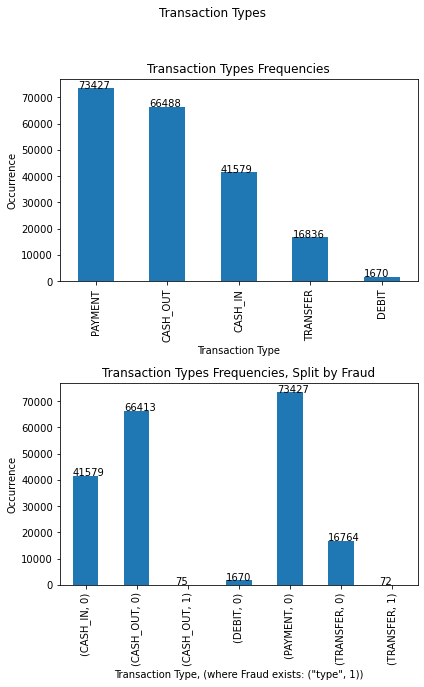

In [60]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction Types Frequencies')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Occurrence')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Types Frequencies, Split by Fraud')
    axs[1].set_xlabel('Transaction Type, (where Fraud exists: ("type", 1))')
    axs[1].set_ylabel('Occurrence')
    fig.suptitle('Transaction Types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'The data suggests that fraudelent activity is only seen in "CASH_OUT" and "TRANSFER" transactions. As such, it is recommended that management should focus on improving the security and reviewing on transactions in these two sectors.'

visual_1(df_transactions)

# Question 2

'"CASH_OUT" refers to the withdrawal of physical money. Only half of the quadrants have any activity, indicating that the dataset is sound. The y = -x line where x >= 0 suggests an instant settlement.'

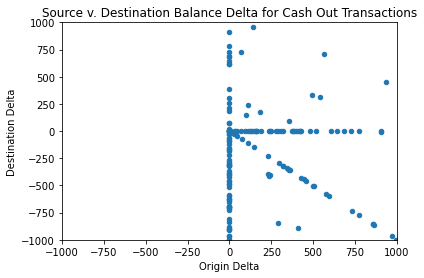

In [64]:
def visual_2(df):
    def query(df):
        df['Origin Delta'] = df['oldbalanceOrg'] -df['newbalanceOrig']
        df['Destination Delta'] = df['oldbalanceDest'] -df['newbalanceDest']
        return df[df['type']=='CASH_OUT']
    plot = query(df).plot.scatter(x='Origin Delta',y='Destination Delta')
    plot.set_title('Source v. Destination Balance Delta for Cash Out Transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return '"CASH_OUT" refers to the withdrawal of physical money. Only half of the quadrants have any activity, indicating that the dataset is sound. The y = -x line where x >= 0 suggests an instant settlement.'
visual_2(df_transactions)

# Question 3

In [174]:
fraud_count = df_transactions[df_transactions['isFraud'] == 1].value_counts()
flagged_count = df_transactions[df_transactions['isFlaggedFraud'] == 1].value_counts()

def exercise_custom(df1, df2):
    df = pd.DataFrame([True] * len(df1) + [False] * len(df2))
    return(df)

def visual_custom():
    g_q1 = sns.catplot(x=0, kind='count', order=[True, False], data=exercise_custom(fraud_count, flagged_count), height=4, aspect=1)
    g_q1.set(xlabel='Flagged or Frauded?', ylabel='Number of Instances')
    g_q1.set_xticklabels(labels=['Fraud', 'Flagged'])
    
    plt.tight_layout()
    plt.title('How much of the Data was flagged or frauded?')
    plt.show()

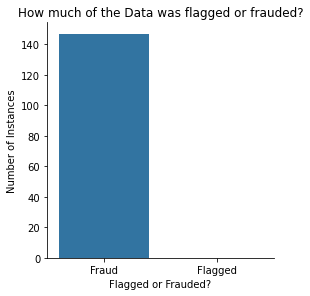

In [175]:
visual_custom()